# **Análisis y exploración de datos (EDA).**
El **Análisis Exploratorio de Datos (EDA)** es una fase clave en cualquier proyecto de análisis o modelado predictivo. Su objetivo es comprender la estructura, la calidad y las características de los datos antes de aplicar cualquier modelo o transformación.

*Este análisis es fundamental para asegurar que los datos sean adecuados antes de entrenar cualquier modelo.*

## **Importación de librerías.**
Se cargan las librerías necesarias (incluidas en el archivo `requirements.txt`) para trabajar con manipulación de datos y archivos.

In [111]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## **Importación e información de Dataframes.**

In [112]:
df = pd.read_csv('../data/cleaned/MONGO00_All_v1.csv', index_col=0)
df.head()

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094
P1000003,90.92,203.97,121.79,12.95,8.56,245.11,1.26,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1695.42,450,1,0,Temporal,1,1,1,Baja,0,78,M,Viudo,Secundaria,Autónomo,Centro,Indonesia,55575
P1000004,69.17,154.33,78.34,12.34,8.20,234.44,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1709.51,150,1,0,Temporal,1,1,1,Moderada,1,38,F,Soltero,Posgrado,Autónomo,Norte,Chile,20826


In [113]:
df.shape

(50000, 39)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, P1000000 to P1049999
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   glucosa              50000 non-null  float64
 1   colesterol           50000 non-null  float64
 2   trigliceridos        50000 non-null  float64
 3   hemoglobina          50000 non-null  float64
 4   leucocitos           50000 non-null  float64
 5   plaquetas            50000 non-null  float64
 6   creatinina           50000 non-null  float64
 7   diabetes             50000 non-null  int64  
 8   hipertension         50000 non-null  int64  
 9   obesidad             50000 non-null  int64  
 10  cancer               50000 non-null  int64  
 11  enfermedad_cardiaca  50000 non-null  int64  
 12  asma                 50000 non-null  int64  
 13  epoc                 50000 non-null  int64  
 14  mut_BRCA1            50000 non-null  int64  
 15  mut_TP53             50000 non-

El presente modelo de red neuronal tiene como objetivo **predecir la probabilidad de supervivencia** de un paciente (`vive = 1`) en base a un conjunto heterogéneo de variables clínicas, genéticas, socioeconómicas y demográficas. Cada grupo de variables aporta información complementaria que puede ser determinante para identificar patrones de riesgo. A continuación se describe el propósito específico de cada conjunto de variables dentro del modelo:
1. **Variables bioquímicas:** Estas variables reflejan el estado fisiológico y metabólico del paciente en el momento del análisis. Son esenciales para evaluar alteraciones funcionales que pueden estar asociadas a condiciones críticas.
    - `glucosa`, `colesterol`, `trigliceridos`: indicadores metabólicos relacionados con riesgo cardiovascular y complicaciones sistémicas.
    - `hemoglobina`, `leucocitos`, `plaquetas`: marcadores hematológicos clave para detectar anemia, infecciones o problemas inmunológicos.
    - `creatinina`: medida de función renal, importante en pacientes crónicos o polimedicados.

    Estas variables deben ser tratadas como **predictoras continuas**, y **normalizadas** antes de introducirse en la red.

2. **Variables clínicas:** Incluyen antecedentes y diagnósticos médicos relevantes, que afectan directamente al pronóstico del paciente.
    - `diabetes`, `hipertension`, `obesidad`, `cancer`, `enfermedad_cardiaca`, `asma`, `epoc`: condiciones clínicas codificadas como binarias (presente/no presente), que influyen significativamente en el riesgo de mortalidad.

    Estas variables actuarán como **factores de riesgo explícitos**, directamente introducibles en el modelo como **variables categóricas binarias**.

3. **Variables genéticas:** Representan la presencia de mutaciones en genes asociados a riesgo oncológico o enfermedades crónicas.
    - `mut_BRCA1`, `mut_TP53`, `mut_EGFR`, `mut_KRAS`, `mut_PIK3CA`, `mut_ALK`, `mut_BRAF`: presencia/ausencia de mutaciones genéticas, todas de tipo binario.

    Se usarán como **indicadores moleculares de susceptibilidad o agresividad clínica**.

4. **Variables socioeconómicas:** Estas variables permiten modelar el **contexto económico del paciente**, lo cual puede condicionar el acceso a cuidados, adherencia al tratamiento o exposición a factores de riesgo.
    - `ingresos_mensuales`: nivel de ingresos del hogar (requiere limpieza y transformación numérica).
    - `gastos_salud`, `deudas`: nivel de carga económica en salud o endeudamiento.
    - `seguro_salud`, `ayudas_publicas`: cobertura de necesidades básicas y acceso a servicios.
    - `tipo_empleo`: nivel de estabilidad laboral o exposición laboral (requiere codificación categórica).

    Estas variables se utilizarán para enriquecer el modelo con información **social y financiera**, relevante en medicina personalizada.

5. **Variables de estilo de vida:** Influyen directamente en el pronóstico, ya que reflejan **conductas de riesgo o factores protectores**.
    - `fumador`, `alcohol`: consumo de sustancias nocivas.
    - `actividad_fisica`: nivel de movilidad o ejercicio, que puede tener un efecto protector.

    Estas variables se integrarán como **predictoras categóricas discretas**, especialmente útiles para ajustar perfiles de riesgo.

6. **Variable objetivo**
    - `vive`: variable binaria que indica si el paciente ha sobrevivido tras un periodo crítico. Esta es la **variable objetivo del modelo** y se utilizará para entrenamiento supervisado.

7. **Variables demográficas y contexto:** Estas variables permiten contextualizar al paciente dentro de su entorno social y cultural, lo que puede afectar directa o indirectamente a su salud.
    - `edad`: variable continua de alta relevancia clínica.
    - `sexo`, `estado_civil`, `nivel_educativo`, `ocupacion`, `region`, `pais_nacimiento`, `codigo_postal`: variables categóricas con posible relación con factores estructurales de salud y mortalidad.

    Se incorporarán al modelo con el objetivo de **detectar patrones diferenciales por perfil poblacional**.



In [115]:
df.nunique()

glucosa                 6474
colesterol             11682
trigliceridos          11792
hemoglobina              683
leucocitos               675
plaquetas              15953
creatinina               164
diabetes                   2
hipertension               2
obesidad                   2
cancer                     2
enfermedad_cardiaca        2
asma                       1
epoc                       2
mut_BRCA1                  2
mut_TP53                   2
mut_EGFR                   2
mut_KRAS                   2
mut_PIK3CA                 2
mut_ALK                    2
mut_BRAF                   2
ingresos_mensuales     44329
gastos_salud               5
seguro_salud               1
deudas                     2
tipo_empleo                5
ayudas_publicas            1
fumador                    2
alcohol                    1
actividad_fisica           3
vive                       2
edad                      72
sexo                       2
estado_civil               4
nivel_educativ

In [116]:
df.describe(include='all')

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000,50000.0,50000.000000,50000.0,50000,50000.000000,50000.000000,50000,50000,50000,50000,50000,50000,50000.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,3,NaN,NaN,2,4,4,4,5,243,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desempleado,NaN,NaN,NaN,Moderada,NaN,NaN,F,Casado,Secundaria,Jubilado,Centro,Congo,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10065,NaN,NaN,NaN,20821,NaN,NaN,25086,12628,12638,12568,10094,439,NaN
mean,94.256713,196.260309,147.157669,13.502815,7.053920,249.990116,1.039304,0.212540,0.262800,0.368300,0.118140,0.194140,0.0,0.036220,0.098940,0.099860,0.102120,0.100500,0.101340,0.103380,0.100300,1701.924308,228.762000,1.0,0.192720,NaN,1.0,0.364360,1.0,NaN,0.871680,53.398700,NaN,NaN,NaN,NaN,NaN,NaN,50001.09824
std,12.925690,26.787774,26.810501,1.001045,1.010373,39.910050,0.214209,0.409109,0.440159,0.482348,0.322777,0.395541,0.0,0.186839,0.298584,0.299816,0.302809,0.300669,0.301781,0.304458,0.300403,665.406504,88.941023,0.0,0.394439,NaN,0.0,0.481255,0.0,NaN,0.334449,20.799006,NaN,NaN,NaN,NaN,NaN,NaN,28692.22255
min,50.860000,103.280000,46.700000,9.440000,2.890000,97.030000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,150.000000,1.0,0.000000,NaN,1.0,0.000000,1.0,NaN,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,501.00000
25%,85.180000,177.260000,128.767500,12.820000,6.370000,223.180000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1240.310000,150.000000,1.0,0.000000,NaN,1.0,0.000000,1.0,NaN,1.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,25049.75000
50%,93.160000,195.090000,147.210000,13.500000,7.050000,250.440000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1696.680000,250.000000,1.0,0.000000,NaN,1.0,0.000000,1.0,NaN,1.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,49844.00000
75%,102.460000,214.320000,165.110000,14.180000,7.730000,276.850000,1.180000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2154.200000,250.000000,1.0,0.000000,NaN,1.0,1.000000,1.0,NaN,1.000000,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,74866.25000


In [117]:
df.head(3)

,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,asma,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas,fumador,alcohol,actividad_fisica,vive,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal
paciente_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1000000,108.81,226.16,161.07,13.24,6.12,258.09,0.97,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2699.72,450,1,0,Público,1,1,1,Baja,1,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471
P1000001,74.23,148.89,110.77,13.68,6.97,278.32,0.85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3403.55,150,1,0,Temporal,1,0,1,Moderada,0,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903
P1000002,88.61,177.53,91.93,12.76,7.54,245.35,1.59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2422.41,150,1,0,Desempleado,1,1,1,Baja,1,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094


## **Preguntas Clave y Visualización de Datos para el Análisis.**
El análisis exploratorio de datos no solo permite entender la estructura del dataset, sino que también ayuda a formular preguntas clave que guíen el preprocesamiento y el modelado. Estas preguntas permiten identificar patrones, relaciones entre variables y posibles factores que influyen en el comportamiento de los clientes. Para responder a estas preguntas, utilizamos técnicas de visualización de datos, lo que facilita la interpretación de tendencias y correlaciones dentro del dataset.



### **Distribución de la variable objetivo.**
La variable `vive` es la variable objetivo de nuestro modelo de clasificación. Se trata de una variable binaria que indica si un paciente ha sobrevivido (`vive = 1`) o no (`vive = 0`) tras un periodo crítico.

Este análisis tiene como objetivos:
- Verificar el **balance de clases**
- Identificar la necesidad de aplicar técnicas de remuestreo
- Explorar su relación con otras variables clave del dataset

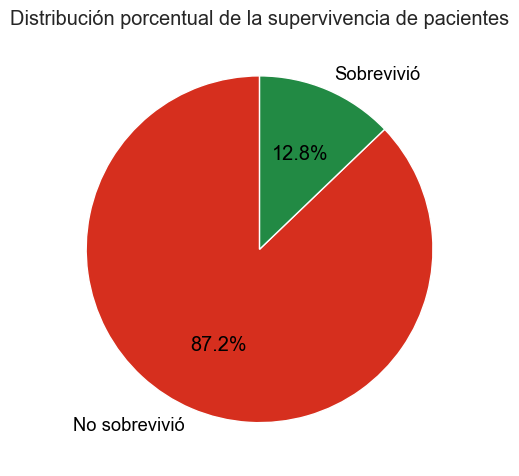

In [118]:
porcentaje = df['vive'].value_counts(normalize=True) * 100
# Pie chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(porcentaje,
       labels=['No sobrevivió', 'Sobrevivió'],
       autopct='%1.1f%%',
       startangle=90,
       colors=[sns.color_palette("OrRd", 3)[2], sns.color_palette("Greens", 3)[2]],
       textprops={'color': 'black'})
ax.set_title("Distribución porcentual de la supervivencia de pacientes")
plt.tight_layout()
plt.show()

El análisis de la variable objetivo `vive` revela un **claro desbalance de clases**, donde menos del **15% de los pacientes han sobrevivido** frente a un casi **90% que no lo ha hecho**. Este patrón refleja un escenario clínico de alta mortalidad, coherente con la naturaleza crítica del contexto médico abordado.

Desde el punto de vista del modelado, este desequilibrio puede provocar que un clasificador estándar tienda a **predecir mayoritariamente la clase mayoritaria (no supervivencia)**, resultando en un modelo sesgado y con baja sensibilidad hacia los casos positivos (pacientes que sobreviven).

Por ello, será necesario aplicar **técnicas de balanceo** como *SMOTE*, *Oversampling* o ajuste de pesos en la función de pérdida durante el entrenamiento de la red neuronal, para garantizar que el modelo pueda **detectar correctamente patrones asociados a la supervivencia**, aunque sean menos frecuentes.

### **Análisis de Biomarcadores Bioquímicos en Relación con la Supervivencia.**
Los biomarcadores clínicos extraídos de sangre (como la glucosa o la creatinina) son fundamentales para evaluar el estado fisiológico general de un paciente. En este análisis, se explora la relación entre estos indicadores y la variable objetivo `vive` mediante visualizaciones tipo boxplot, que permiten identificar posibles diferencias estadísticas entre pacientes que sobrevivieron y los que no. Estos patrones son claves para construir un modelo predictivo clínicamente relevante.

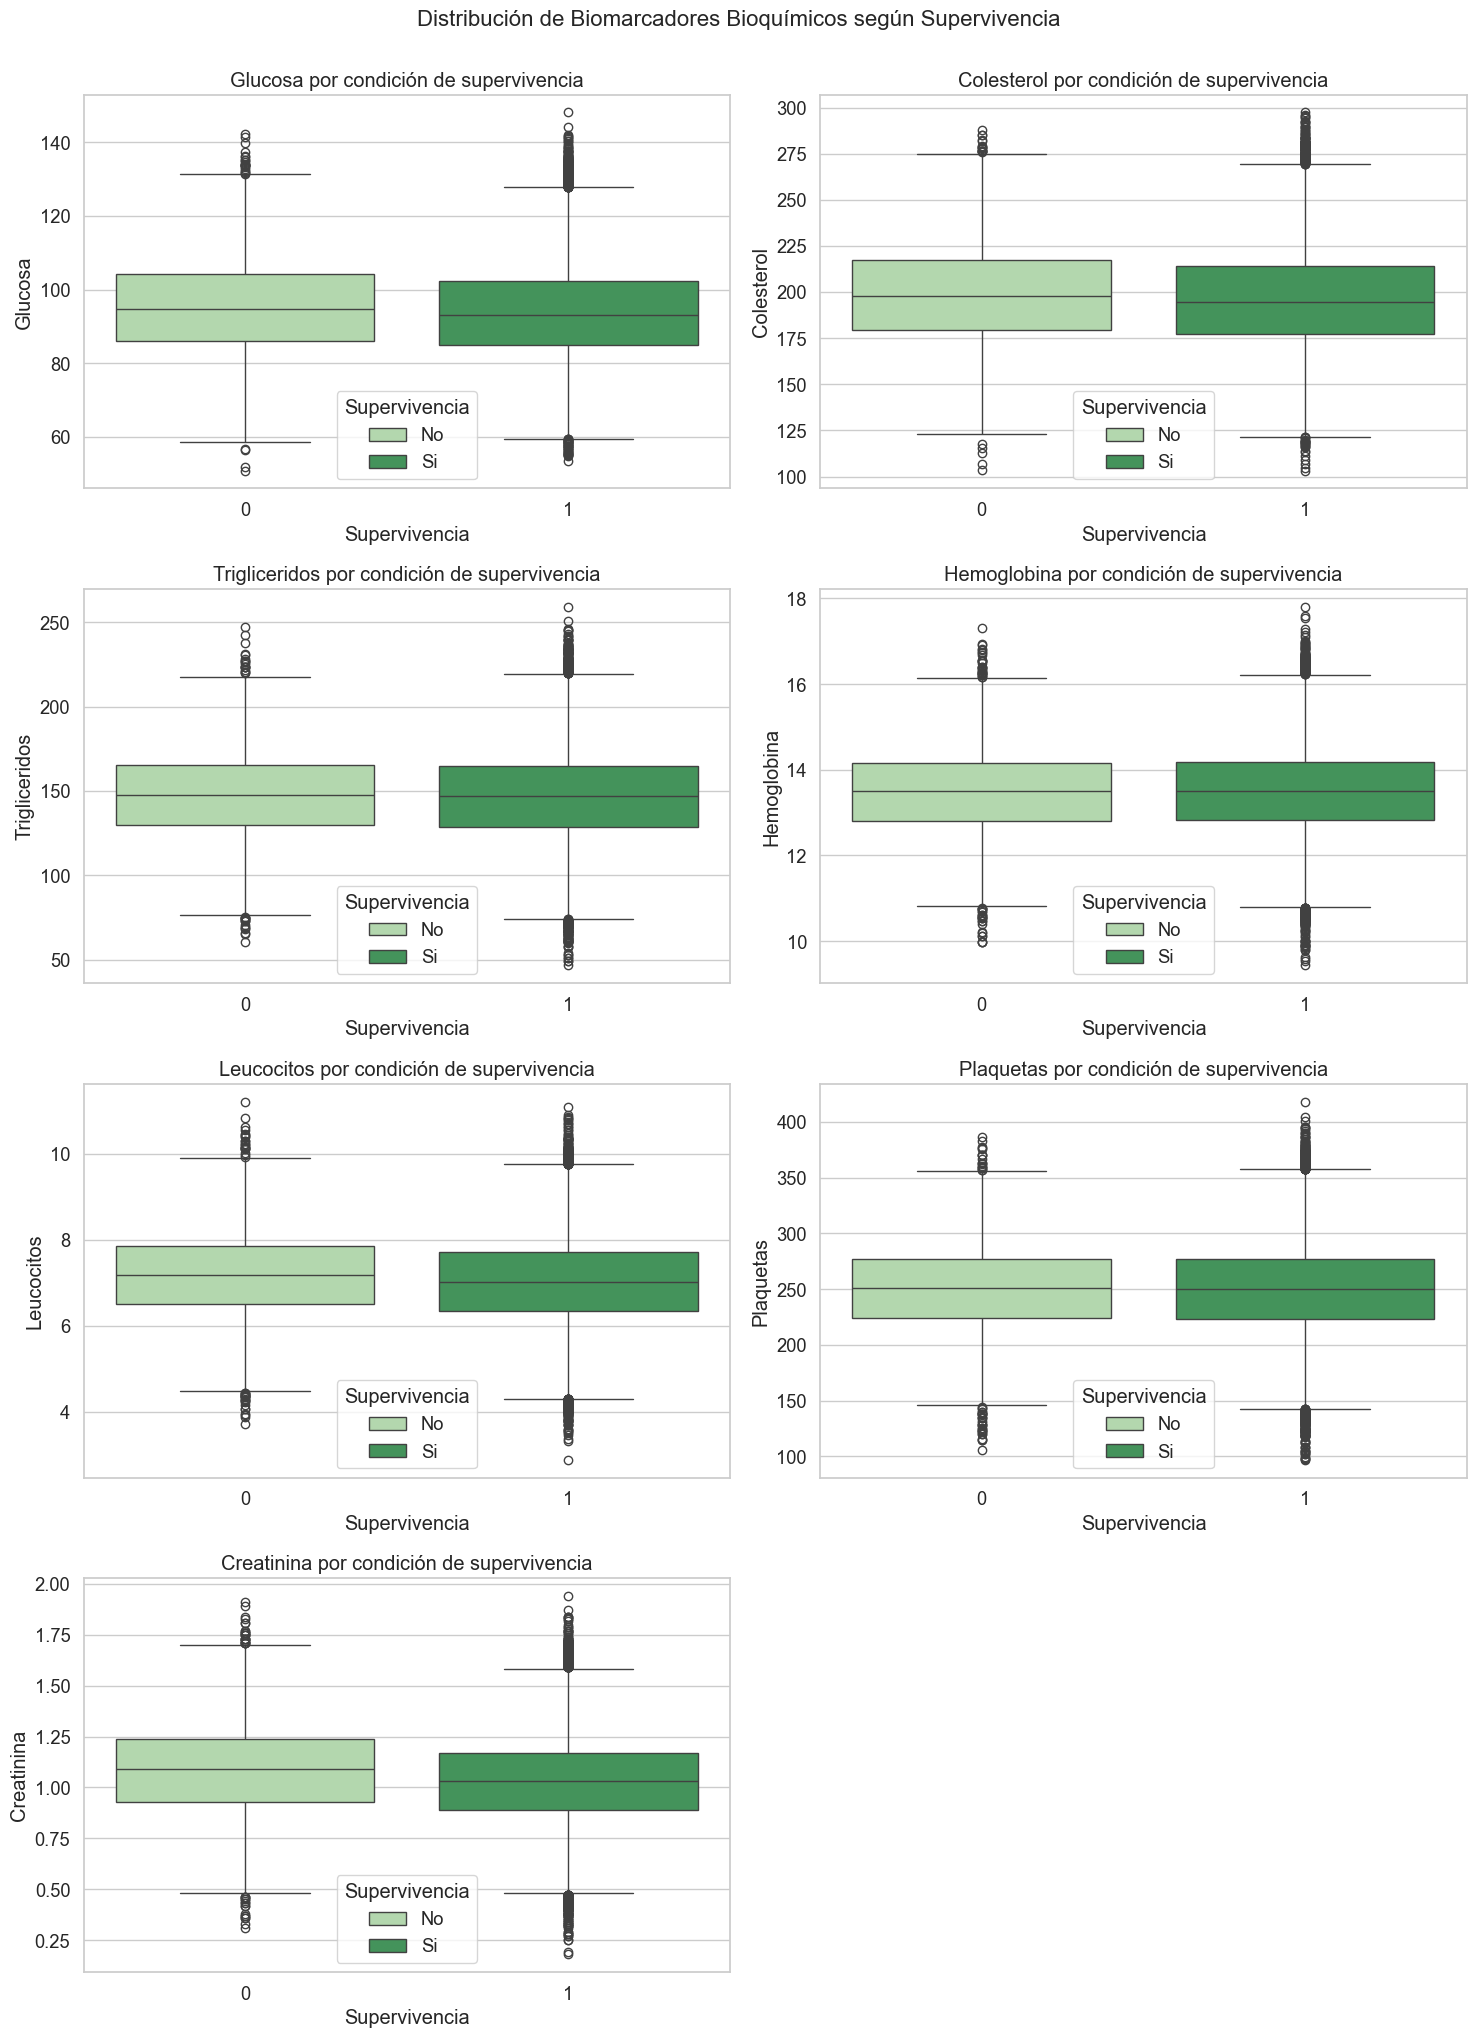

In [119]:
# Lista de variables bioquímicas
biomarcadores = ['glucosa', 'colesterol', 'trigliceridos',
    'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina']

plt.figure(figsize=(15, 20))
for i, col in enumerate(biomarcadores, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='vive', y=col, data=df, palette='Greens', hue='vive')
    plt.title(f'{col.capitalize()} por condición de supervivencia')
    plt.legend(title='Supervivencia', labels=['No', 'Si'])
    plt.xlabel('Supervivencia')
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.suptitle('Distribución de Biomarcadores Bioquímicos según Supervivencia', fontsize=16, y=1.02)
plt.show()

La comparación de distribuciones de biomarcadores bioquímicos entre pacientes que sobrevivieron (`vive = 1`) y los que no (`vive = 0`) revela **diferencias clínicas sutiles pero relevantes**:

- En general, los pacientes que sobrevivieron tienden a mostrar **valores ligeramente más controlados** de glucosa, colesterol, triglicéridos y creatinina, lo que sugiere una **mejor condición metabólica y renal**.
- Variables como **hemoglobina, leucocitos y plaquetas** presentan medianas similares entre grupos, aunque con variabilidad que podría indicar estados inflamatorios, inmunitarios o anémicos más pronunciados en el grupo no sobreviviente.
- A pesar de que las diferencias visuales no son extremas, el patrón general apunta a una **mayor estabilidad fisiológica** en los pacientes que superaron el periodo crítico.

Este análisis respalda la hipótesis de que ciertos biomarcadores de laboratorio pueden contener **información predictiva útil** para modelar la probabilidad de supervivencia, y justifica su inclusión como variables clave en la etapa de entrenamiento del modelo de red neuronal.

### **Asociación entre Mutaciones Genéticas y Supervivencia.**
Las mutaciones genéticas están estrechamente ligadas a la progresión de enfermedades crónicas y oncológicas. En este análisis, se explora la relación entre distintas mutaciones (por ejemplo, `TP53`, `BRCA1`, `EGFR`, entre otras) y la variable objetivo `vive`. A través de un mapa de calor de correlaciones de Pearson, se busca identificar qué variantes genéticas están asociadas positiva o negativamente con la supervivencia de los pacientes, lo que podría orientar tanto el modelado predictivo como decisiones clínicas futuras.

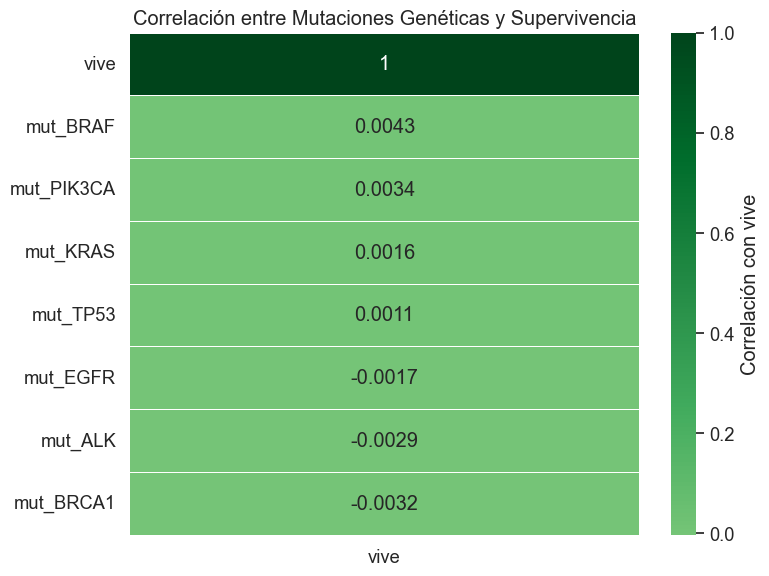

In [120]:
# Variables Genéticas + Objetivo.
cols_mutaciones = [
    'mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS',
    'mut_PIK3CA', 'mut_ALK', 'mut_BRAF', 'vive'
]
corr = df[cols_mutaciones].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr[['vive']].sort_values(by='vive', ascending=False),
            annot=True, cmap='Greens', center=0,
            linewidths=0.5, cbar_kws={'label': 'Correlación con vive'})
plt.title('Correlación entre Mutaciones Genéticas y Supervivencia')
plt.tight_layout()
plt.show()

El análisis de correlación entre las principales mutaciones genéticas y la supervivencia (`vive`) revela que **ninguna de las mutaciones estudiadas presenta una relación lineal significativa con la variable objetivo**. Todas las correlaciones de Pearson se sitúan próximas a cero.

Desde una perspectiva clínica, esto indica que **la mera presencia o ausencia de estas mutaciones, de forma aislada, no parece asociarse directamente con un mayor o menor índice de supervivencia** en esta cohorte. No obstante, esto **no descarta su valor predictivo cuando se combinan con otros factores clínicos o bioquímicos**, especialmente si existen **interacciones no lineales** que podrían ser captadas por modelos como redes neuronales. Por tanto:
- No se justifica eliminar estas variables por falta de correlación lineal.
- Se mantendrán en el conjunto de entrenamiento, dado que **modelos complejos pueden extraer patrones combinados** o no lineales relevantes.

Este análisis sugiere que las mutaciones podrían actuar como **moduladores secundarios del riesgo**, más que como predictores directos, lo cual es coherente con su papel en muchos procesos patológicos.

### **Supervivencia según Tipo de Empleo.**
La situación laboral de una persona puede reflejar su nivel socioeconómico y, por ende, su acceso a recursos sanitarios, estabilidad emocional y adherencia terapéutica. En esta sección se analiza la variable `tipo_empleo`, categórica y socioeconómica, para investigar su relación con la variable objetivo `vive`. Usando un gráfico de barras apiladas, se visualiza el porcentaje de pacientes que sobreviven o no en cada categoría laboral.

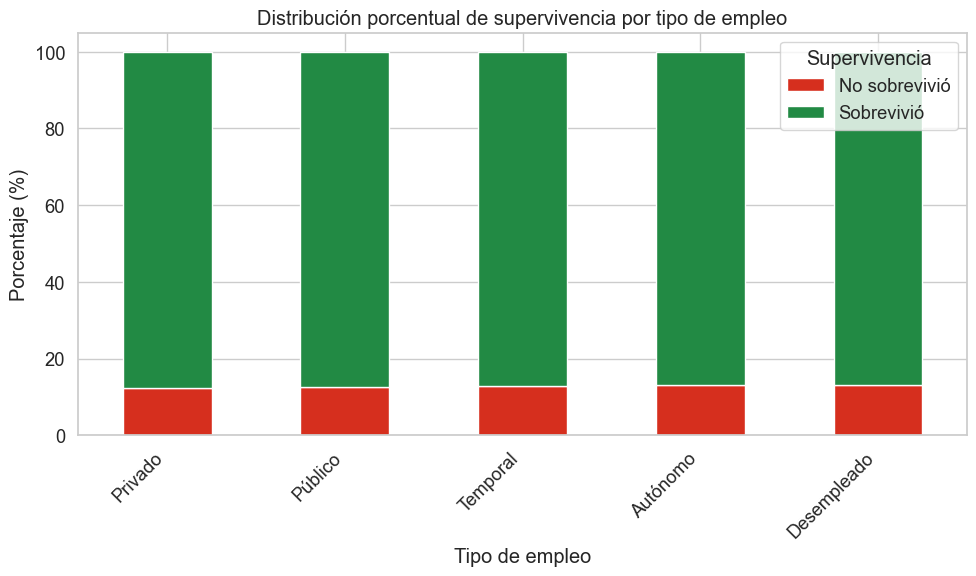

In [121]:
tabla_empleo = pd.crosstab(df['tipo_empleo'], df['vive'], normalize='index') * 100 # Porcentaje por tipo de empleo.
tabla_empleo = tabla_empleo.sort_values(by=1, ascending=False)
tabla_empleo.columns = ['No sobrevivió', 'Sobrevivió']

# Gráfico de barras apiladas.
tabla_empleo.plot(kind='bar', stacked=True, figsize=(10, 6), color=[sns.color_palette("OrRd", 3)[2], sns.color_palette("Greens", 3)[2]])
plt.title('Distribución porcentual de supervivencia por tipo de empleo')
plt.xlabel('Tipo de empleo')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Supervivencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El análisis de la variable `tipo_empleo` revela que **la proporción de supervivencia se mantiene sorprendentemente constante entre las diferentes categorías laborales**. A pesar de que el empleo puede estar asociado con el nivel socioeconómico y el acceso a servicios de salud, **no se observan diferencias sustanciales en los porcentajes de supervivencia entre pacientes con empleo público, privado, temporal, autónomo o desempleados**.

Esta homogeneidad sugiere que, en esta cohorte, el tipo de empleo **no actúa como un factor discriminativo directo en la predicción de la supervivencia**. No obstante, es importante considerar que:

- Esta variable podría interactuar con otras como `ingresos_mensuales`, `deudas`, o `seguro_salud`, y su efecto conjunto podría ser relevante en modelos no lineales como redes neuronales.
- El tratamiento de `tipo_empleo` como variable categórica codificada (por ejemplo, one-hot) sigue siendo válido, especialmente si se buscan interacciones o patrones ocultos en combinación con otras dimensiones socioeconómicas.

Por tanto, se mantendrá `tipo_empleo` en el modelo, no como predictor principal, sino como parte de un conjunto de variables estructurales que pueden aportar información contextual complementaria.

### **Interacción entre Obesidad y Actividad Física: Impacto Combinado en la Supervivencia.**
Este análisis examina la interacción entre dos factores clave del estilo de vida y la salud metabólica: **la presencia de obesidad** y **el nivel de actividad física**. A través de una segmentación cruzada, se identifican cuatro perfiles de pacientes que combinan estas dos dimensiones, con el objetivo de evaluar cómo influyen conjuntamente sobre la probabilidad de supervivencia.

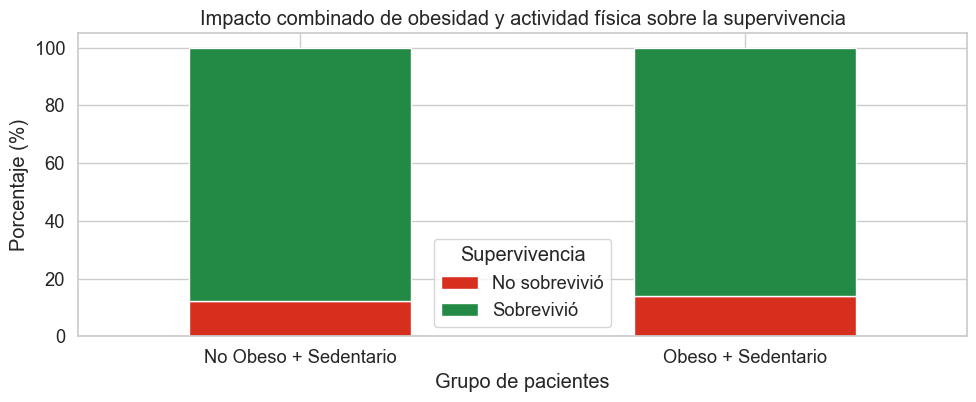

In [122]:
df['grupo_estilo'] = df.apply(
    lambda row: f"{'Obeso' if row['obesidad'] == 1 else 'No Obeso'} + {'Activo' if row['actividad_fisica'] == 1 else 'Sedentario'}",
    axis=1
)

tabla_combinada = pd.crosstab(df['grupo_estilo'], df['vive'], normalize='index') * 100
tabla_combinada = tabla_combinada.rename(columns={0: 'No sobrevivió', 1: 'Sobrevivió'})
tabla_combinada = tabla_combinada.sort_values(by='Sobrevivió', ascending=False)

tabla_combinada.plot(kind='bar', stacked=True, figsize=(10, 6), color=[sns.color_palette("OrRd", 3)[2], sns.color_palette("Greens", 3)[2]])
plt.title('Impacto combinado de obesidad y actividad física sobre la supervivencia')
plt.xlabel('Grupo de pacientes')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Supervivencia')
plt.tight_layout()
plt.xticks(rotation=0, ha='center')
plt.show()

El análisis conjunto de las variables `obesidad` y `actividad_fisica` revela que **el estilo de vida sedentario, independientemente del estado de obesidad, está asociado a una menor probabilidad de supervivencia**. Si bien en el gráfico actual se muestran dos grupos ("Obeso + Sedentario" y "No Obeso + Sedentario"), se observa que los pacientes no obesos presentan una **ligera ventaja en términos de supervivencia**, incluso cuando ambos grupos son sedentarios.

Este resultado sugiere que la obesidad por sí sola **puede actuar como un factor de riesgo adicional** dentro de un estilo de vida sedentario. La combinación de ambas condiciones parece tener un **efecto acumulativo negativo** sobre el pronóstico vital, lo que refuerza la importancia de abordar conjuntamente el control del peso y la promoción de la actividad física en contextos clínicos preventivos.

Desde el punto de vista del modelado, esta interacción justifica:
- La inclusión explícita de ambas variables como predictoras independientes.
- La posible creación de variables derivadas o términos de interacción, que una red neuronal puede captar de forma implícita.

Este tipo de relaciones entre factores de estilo de vida y mortalidad refuerza el valor de un enfoque multidimensional en la predicción clínica.

### **Relación entre Mutaciones Genéticas y Enfermedades Crónicas en Pacientes.**
Este análisis visualiza la posible asociación entre **mutaciones genéticas relevantes** y la presencia de **enfermedades crónicas preexistentes**. Se calcula la proporción de pacientes con cada enfermedad dentro del subgrupo que presenta cada mutación. Esta matriz de frecuencias permite identificar **patrones de riesgo genético-clínico**, ofreciendo una perspectiva útil para el diseño de estrategias personalizadas de seguimiento o prevención.

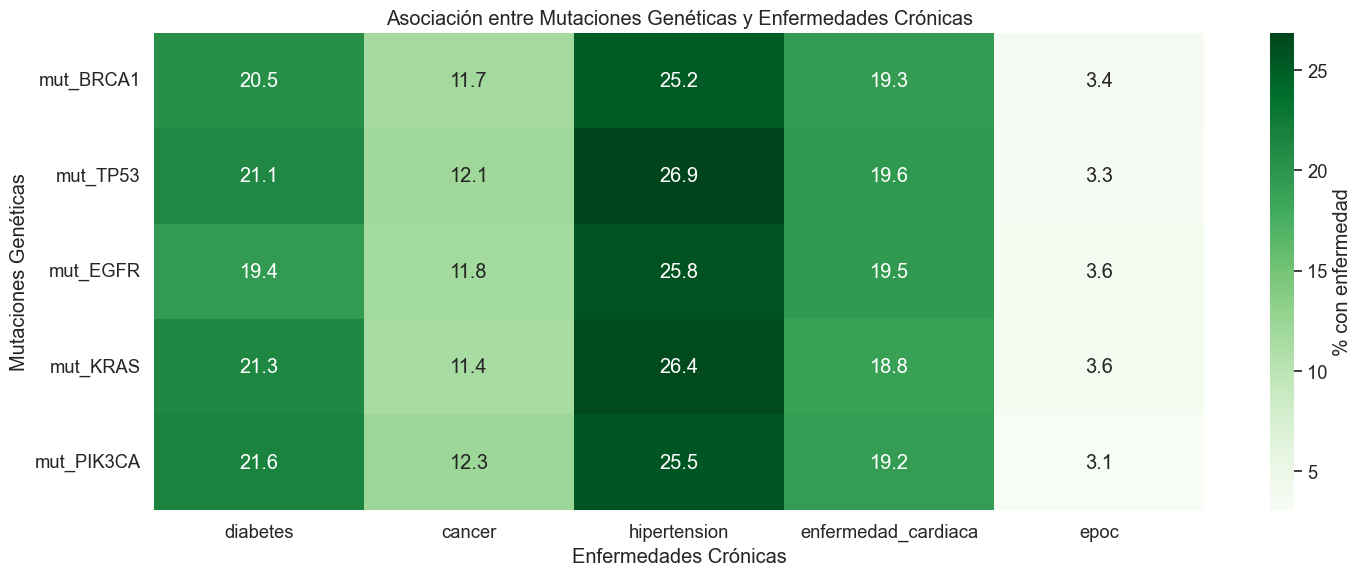

In [123]:
mutaciones = ['mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS', 'mut_PIK3CA']
enfermedades = ['diabetes', 'cancer', 'hipertension', 'enfermedad_cardiaca', 'epoc']

# Crear tabla: Porcentaje de pacientes con enfermedad dado que tienen la mutación.
resultados = pd.DataFrame(index=mutaciones, columns=enfermedades)

for mut in mutaciones:
    grupo = df[df[mut] == 1]  # Pacientes con la mutación.
    for enf in enfermedades:
        porcentaje = grupo[enf].mean() * 100  # % que tienen la enfermedad.
        resultados.loc[mut, enf] = porcentaje
resultados = resultados.astype(float)

plt.figure(figsize=(15, 6))
sns.heatmap(resultados, annot=True, fmt=".1f", cmap="Greens", cbar_kws={'label': '% con enfermedad'})
plt.title('Asociación entre Mutaciones Genéticas y Enfermedades Crónicas')
plt.xlabel('Enfermedades Crónicas')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Mutaciones Genéticas')
plt.tight_layout()
plt.show()

El análisis muestra que ciertos perfiles genéticos se asocian con una mayor prevalencia de enfermedades crónicas. En particular:

- Las mutaciones en **TP53, KRAS y PIK3CA** muestran los porcentajes más altos de asociación con **hipertensión** (superiores al 25%).
- **BRCA1 y TP53** también presentan una incidencia elevada de **diabetes** y **enfermedad cardíaca**, reforzando su papel como posibles marcadores de vulnerabilidad sistémica más allá del cáncer.
- La relación con enfermedades respiratorias como **EPOC** es menos pronunciada en todos los casos (alrededor del 3–4%), lo que sugiere una menor conexión genética directa en esta dimensión.

Estas asociaciones no implican causalidad directa, pero sí aportan indicios de que ciertos genotipos pueden **predisponer a perfiles clínicos específicos**, lo cual es relevante tanto para el **análisis predictivo multivariante** como para enfoques personalizados de medicina preventiva o intervencionista.

Desde el punto de vista del modelado, estas mutaciones deben **mantenerse como variables independientes**, ya que su efecto puede manifestarse de forma conjunta con otras dimensiones clínicas o ambientales, especialmente en modelos no lineales como redes neuronales.

### **Análisis Regional de Estilo de Vida y Supervivencia en Pacientes.**
Este gráfico explora la relación entre la **región geográfica** del paciente, sus **hábitos de vida** (como el tabaquismo) y la **supervivencia clínica**. A través de un gráfico de barras segmentado, se visualizan las proporciones de pacientes fumadores en cada región, diferenciando además entre quienes sobrevivieron y quienes no. Esta perspectiva permite detectar **disparidades territoriales en salud conductual y resultados clínicos**, lo cual es valioso para la planificación sanitaria y la asignación de recursos.

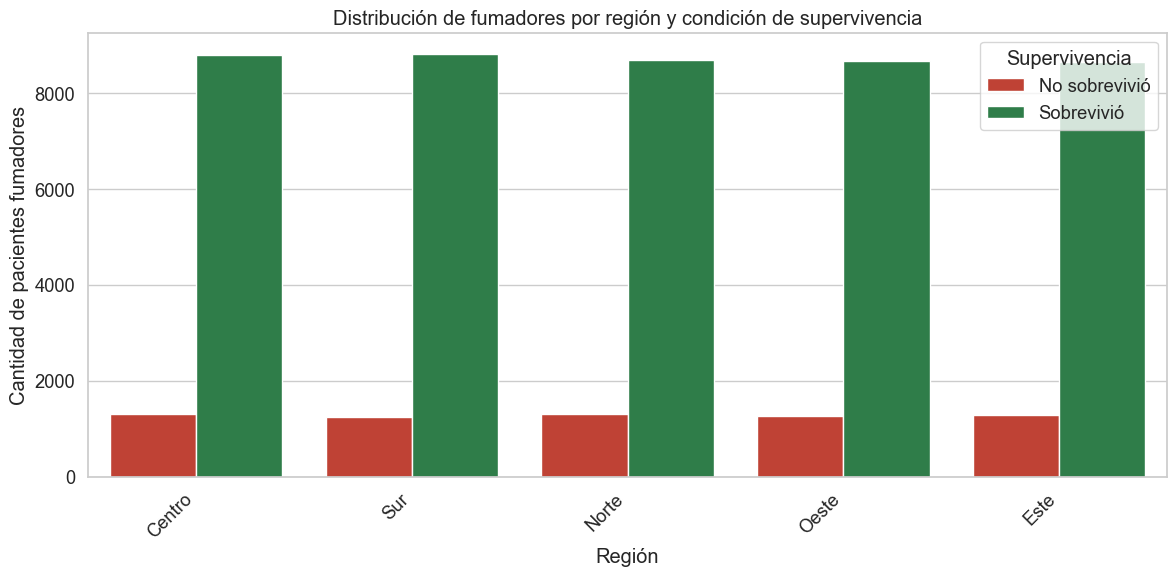

In [124]:
df_regional = df[['region', 'fumador', 'vive']].dropna()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_regional, x='region', hue='vive', palette=[sns.color_palette("OrRd", 3)[2], sns.color_palette("Greens", 3)[2]], hue_order=[0, 1])
plt.title('Distribución de fumadores por región y condición de supervivencia')
plt.xlabel('Región')
plt.ylabel('Cantidad de pacientes fumadores')
plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El análisis muestra que la **distribución de pacientes fumadores es relativamente homogénea entre regiones**, tanto en términos absolutos como en la proporción de supervivencia. No se observan **diferencias marcadas en la mortalidad asociada al tabaquismo entre regiones específicas** como Centro, Norte, Sur, Este u Oeste.

Esto sugiere que, en esta cohorte, **el efecto del tabaquismo sobre la supervivencia parece ser consistente a nivel territorial**, sin evidenciar una interacción significativa entre región geográfica y desenlace clínico. Aunque el hábito de fumar se mantiene como un factor de riesgo bien establecido, **no se detectan disparidades regionales relevantes** en su impacto sobre la mortalidad.

Desde el punto de vista de la planificación sanitaria, este resultado refuerza la necesidad de mantener **estrategias antitabaco uniformes a nivel nacional**, más que priorizar intervenciones focalizadas por territorio. Para el modelado, tanto `fumador` como `region` se consideran **predictoras independientes**, ya que su efecto conjunto no muestra sinergias evidentes en esta visualización.

## **Relación entre las Variables Numéricas.**
El análisis de la relación entre variables numéricas permite identificar patrones, tendencias y posibles correlaciones que pueden influir en la toma de decisiones. En esta etapa, nos enfocamos en visualizar estas relaciones sin realizar modificaciones en los datos, es decir, **no se eliminan valores atípicos ni se procesan datos**, ya que el objetivo es entender la estructura del dataset antes de aplicar transformaciones en el preprocesamiento.

### **Diagramas de Caja.**
El análisis de la distribución de las variables numéricas mediante boxplots permite identificar la presencia de valores atípicos, dispersión y patrones en los datos. En esta visualización, se presentan los boxplots de todas las variables numéricas, facilitando la comparación entre diferentes características. Esto nos ayudará a tomar decisiones informadas en la fase de preprocesamiento.

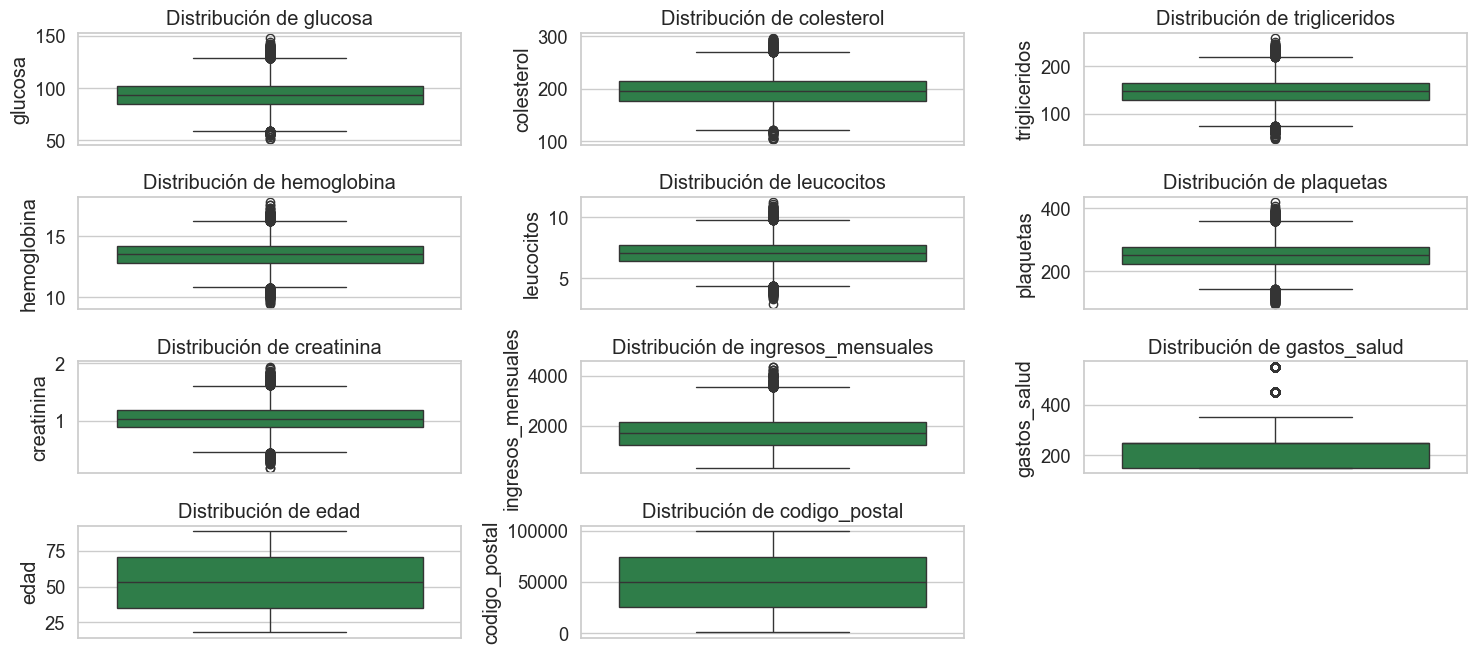

In [125]:
numeric_cols = [
    col for col in df.select_dtypes(include=["number"]).columns # Seleccionar columnas numéricas.
    if df[col].nunique() > 2 # Filtrar columnas no binarias.
]
fig, axes = plt.subplots(nrows=math.ceil(len(numeric_cols) / 2), ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color=sns.color_palette("Greens", 3)[2])
    axes[i].set_xlabel('')
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)): # Quitar ejes vacíos.
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

El análisis mediante gráficos de caja de las variables numéricas continuas revela una serie de aspectos importantes para el preprocesamiento y modelado:

- La mayoría de los **biomarcadores clínicos** como `glucosa`, `colesterol`, `trigliceridos`, `creatinina` y `plaquetas` presentan **asimetrías y valores atípicos (outliers)**, especialmente en los rangos altos. Esto es esperable en contextos clínicos, ya que puede reflejar estados patológicos relevantes.

- Variables económicas como `ingresos_mensuales` y `gastos_salud` muestran una **alta dispersión**, con valores extremos que pueden estar relacionados con desigualdades socioeconómicas. Será necesario aplicar **escalado robusto** (como `RobustScaler`) para evitar que estos valores dominen el aprendizaje del modelo.

- La variable `edad` presenta una distribución más controlada y simétrica, sin presencia significativa de valores anómalos, lo que la hace apta para el modelado directo tras estandarización.

- La variable `codigo_postal`, aunque numérica, **no representa una magnitud continua interpretable**, sino una codificación geográfica. Se recomienda tratarla como una variable categórica o derivar agrupaciones regionales si se desea utilizarla como predictor.

### **Matriz de Correlación.**
La matriz de correlación nos ayudará a detectar qué variables podrían aportar información similar y cuáles tienen una mayor independencia. Esto servirá para tomar decisiones en la fase de preprocesamiento, como la selección de características relevantes y la posible eliminación de variables redundantes.

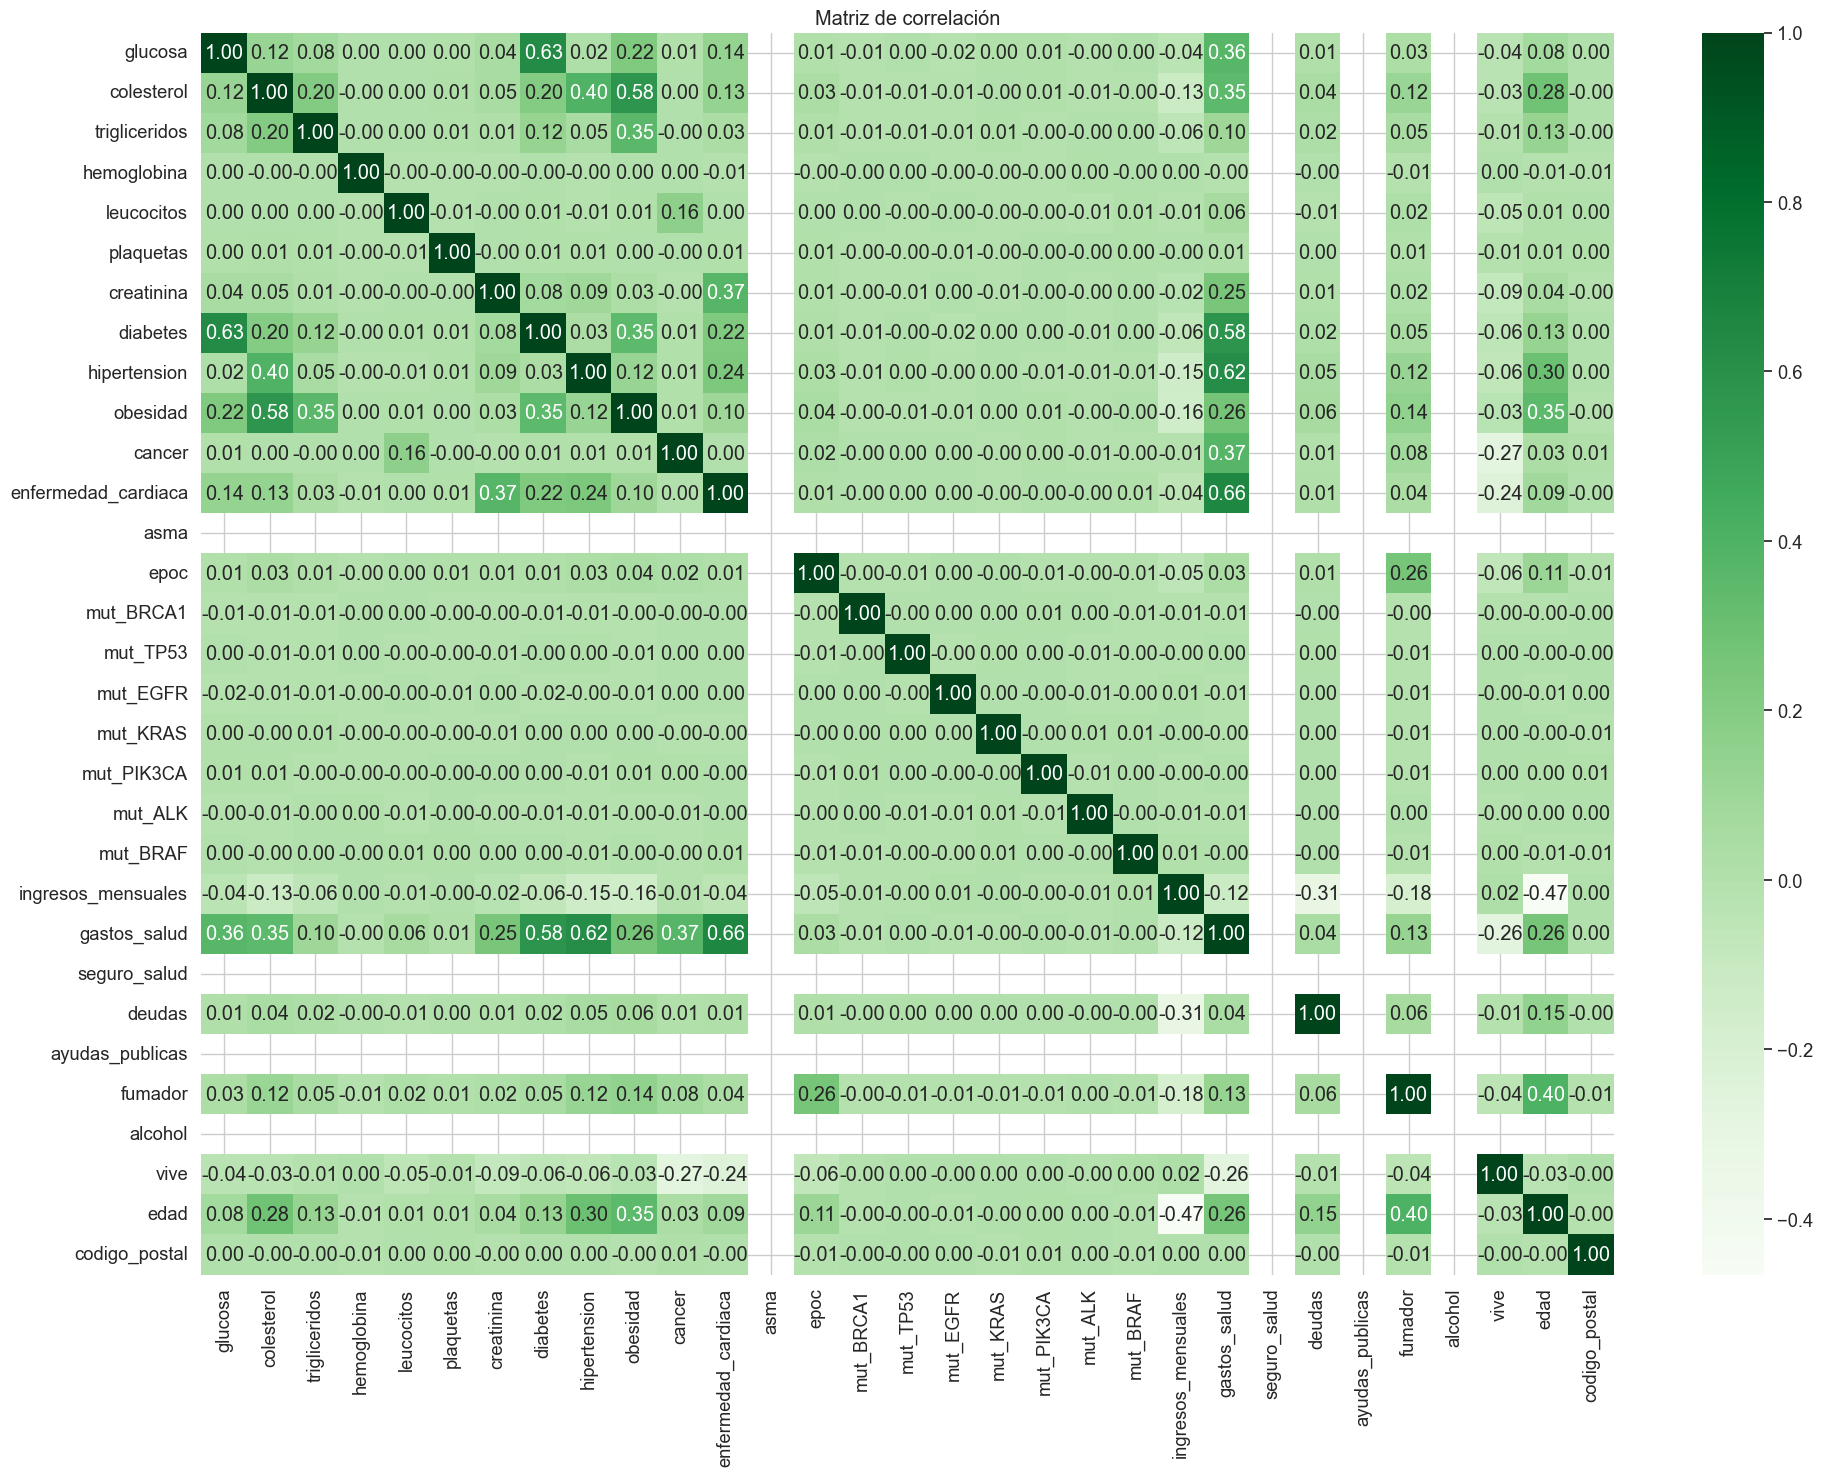

In [126]:
plt.figure(figsize=(20,15))
sns.heatmap(df.select_dtypes(include=['number', 'float']).corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

El análisis de la matriz de correlación de Pearson evidencia que:

- La **variable objetivo `vive` presenta correlaciones negativas moderadas con variables clínicas y sociodemográficas relevantes**, especialmente:
    - `cancer` (r = –0.27)
    - `enfermedad_cardiaca` (r = –0.24)
    - `gastos_salud` (r = –0.26)
    - `fumador` (r = –0.04)
    - `edad` (r = –0.03)

  Estos resultados sugieren que **el deterioro clínico, los costes sanitarios elevados y ciertos hábitos de vida** se asocian a una menor probabilidad de supervivencia.

- Las variables **altamente correlacionadas entre sí**, como:
    - `colesterol` ↔ `obesidad` (r = 0.58)
    - `diabetes` ↔ `glucosa` (r = 0.63)
    - `edad` ↔ `obesidad` (r = 0.35) o `hipertension` (r = 0.30)

  indican posibles **estructuras de colinealidad**, que deberán tenerse en cuenta al construir modelos lineales o al realizar selección de atributos.
- Las **mutaciones genéticas no muestran correlación significativa ni con la supervivencia ni con otras variables clínicas individuales**, lo que sugiere que su impacto podría manifestarse mediante **interacciones no lineales** o combinadas, más que por influencia directa.
- Variables económicas como `ingresos_mensuales` y `deudas` tienen correlación inversa moderada con `gastos_salud`, lo que puede reflejar tensiones financieras asociadas al tratamiento médico.

**Implicaciones para el modelado.**

- Se recomienda **no eliminar ninguna variable** por colinealidad aún, ya que modelos no lineales como redes neuronales pueden beneficiarse de la redundancia informativa si está bien regularizada.
- Las variables con correlación negativa con `vive` serán claves para identificar perfiles de riesgo.
- La **información genómica y de estilo de vida podría adquirir relevancia** al combinarse con otras dimensiones clínicas.